In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('/content/IEA-EV-dataEV salesCarsHistorical (1).csv')
df

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190
...,...,...,...,...,...,...,...,...
829,World,Historical,EV sales,Cars,PHEV,2020,Vehicles,970000
830,World,Historical,EV sales,Cars,PHEV,2021,Vehicles,1900000
831,World,Historical,EV sales,Cars,BEV,2021,Vehicles,4600000
832,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7300000



**Clustering countries by EV adoption rates**

---
The Global EV Outlook is an annual publication that identifies and discusses recent developments in electric mobility across the globe. It is developed with the support of the members of the Electric Vehicles Initiative (EVI).

Combining historical analysis with projections to 2030, the report examines key areas of interest such as electric vehicle and charging infrastructure deployment, energy use, CO2 emissions, battery demand and related policy developments. The report includes policy recommendations that incorporate lessons learned from leading markets to inform policy makers and stakeholders with regard to policy frameworks and market systems for electric vehicle adoption.



The dataset contains the following columns:

region: country
category: historical
parameter: electric vehicle sales
mode: cars
powertrain: BEV, PHEV
-year: 2011 - 2022
-unit: vehicles
-value: amount vehicles sales

In [ ]:
df.head()

,region,category,parameter,mode,powertrain,year,unit,value
0,Australia,Historical,EV sales,Cars,BEV,2011,Vehicles,49
1,Australia,Historical,EV sales,Cars,BEV,2012,Vehicles,170
2,Australia,Historical,EV sales,Cars,PHEV,2012,Vehicles,80
3,Australia,Historical,EV sales,Cars,PHEV,2013,Vehicles,100
4,Australia,Historical,EV sales,Cars,BEV,2013,Vehicles,190


In [ ]:
df.tail()

,region,category,parameter,mode,powertrain,year,unit,value
829,World,Historical,EV sales,Cars,PHEV,2020,Vehicles,970000
830,World,Historical,EV sales,Cars,PHEV,2021,Vehicles,1900000
831,World,Historical,EV sales,Cars,BEV,2021,Vehicles,4600000
832,World,Historical,EV sales,Cars,BEV,2022,Vehicles,7300000
833,World,Historical,EV sales,Cars,PHEV,2022,Vehicles,2900000


In [ ]:
df.columns

Index(['region', 'category', 'parameter', 'mode', 'powertrain', 'year', 'unit',
       'value'],
      dtype='object')

In [ ]:
df.dtypes

,0
region,object
category,object
parameter,object
mode,object
powertrain,object
year,int64
unit,object
value,int64


In [ ]:
df.isna().sum()

,0
region,0
category,0
parameter,0
mode,0
powertrain,0
year,0
unit,0
value,0


In [ ]:
df.drop(['category'],axis=1,inplace=True)
df.drop(['parameter'],axis=1,inplace=True)
df.drop(['mode'],axis=1,inplace=True)
df.drop(['unit'],axis=1,inplace=True)
df

,region,powertrain,year,value
0,Australia,BEV,2011,49
1,Australia,BEV,2012,170
2,Australia,PHEV,2012,80
3,Australia,PHEV,2013,100
4,Australia,BEV,2013,190
...,...,...,...,...
829,World,PHEV,2020,970000
830,World,PHEV,2021,1900000
831,World,BEV,2021,4600000
832,World,BEV,2022,7300000


We need the region, year, and value columns to represent EV sales.

In [ ]:
# total_sales = df.groupby('region')['value'].sum().reset_index()
# total_sales.columns = ['region', 'total_sales']

# sales_growth = df.groupby(['region', 'year'])['value'].sum().groupby(level=0).pct_change().reset_index()
# sales_growth.columns = ['region', 'year', 'sales_growth']

# years_active = df.groupby('region')['year'].nunique().reset_index()  # Number of unique years with sales data per country
# years_active.columns = ['region', 'years_active']

# avg_sales = total_sales.merge(years_active, on='region')  # Merge total sales with years active
# avg_sales['avg_sales_per_year'] = avg_sales['total_sales'] / avg_sales['years_active']

# bev_sales = df[df['powertrain'] == 'BEV'].groupby('region')['value'].sum().reset_index()
# phev_sales = df[df['powertrain'] == 'PHEV'].groupby('region')['value'].sum().reset_index()


# bev_sales.columns = ['region', 'bev_sales']
# phev_sales.columns = ['region', 'phev_sales']

# bev_phev_dist = pd.merge(bev_sales, phev_sales, on='region', how='outer').fillna(0)

# bev_phev_dist['bev_to_phev_ratio'] = bev_phev_dist['bev_sales'] / bev_phev_dist['phev_sales'].replace(0, 1)

# df1 = total_sales.merge(avg_sales[['region', 'avg_sales_per_year']], on='region')
# df1 = df1.merge(bev_phev_dist[['region', 'bev_sales', 'phev_sales', 'bev_to_phev_ratio']], on='region')
# df1


Feature Engineering:

1.Total EV sales for each country.
2.Sales growth over the years (rate of adoption).
3.Average EV sales per year.
4.BEV vs PHEV distribution

In [ ]:
region_sales = df.groupby(['region', 'year'])['value'].sum().reset_index()


df1 = region_sales.pivot(index='region', columns='year', values='value').fillna(0)

# Calculate total EV sales across all years for each region
df1['total_sales'] = df1.sum(axis=1)
df1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,total_sales
region,,,,,,,,,,,,,,
Australia,0.0,49.0,250.0,290.0,1320.0,1760.0,1370.0,2300.0,3600.0,9200.0,6900.0,20400.0,38900.0,86339.0
Austria,0.0,0.0,0.0,650.0,1700.0,2800.0,5000.0,7100.0,9100.0,11500.0,23600.0,48000.0,47000.0,156450.0
Belgium,56.0,296.0,910.0,560.0,1950.0,3900.0,9200.0,14700.0,13200.0,17700.0,47000.0,71000.0,97000.0,277472.0
Brazil,0.0,0.0,92.0,163.0,61.0,87.0,177.0,315.0,296.0,1940.0,2480.0,13900.0,18500.0,38011.0
Canada,0.0,520.0,1920.0,3100.0,5100.0,6800.0,11600.0,16700.0,44000.0,51000.0,51000.0,87000.0,114000.0,392740.0
Chile,0.0,6.0,5.0,5.0,17.0,36.0,31.0,135.0,178.0,300.0,189.0,570.0,1500.0,2972.0
China,1440.0,5120.0,9860.0,15730.0,73000.0,211000.0,339000.0,580000.0,1090000.0,1060000.0,1140000.0,3250000.0,5900000.0,13675150.0
Denmark,0.0,422.0,502.0,510.0,1690.0,4720.0,1870.0,1330.0,4600.0,9400.0,32000.0,65000.0,57000.0,179044.0
EU27,1409.0,7080.0,19300.0,45000.0,56000.0,119000.0,118000.0,170000.0,240000.0,390000.0,1050000.0,1750000.0,1980000.0,5945789.0


Aggregate the data by region to compute the total EV sales or a meaningful metric for clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df1[['total_sales']])

In [ ]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)


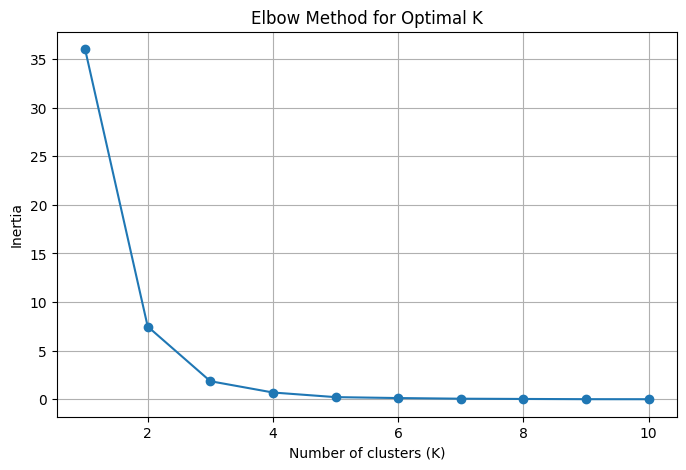

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [ ]:
model1=KMeans(n_clusters=4,init='k-means++',random_state=42)
model1.fit(scaled_features)
y_pred=model1.predict(scaled_features)
y_pred

array([0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
df1['output']=y_pred
df1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,total_sales,output
region,,,,,,,,,,,,,,,
Australia,0.0,49.0,250.0,290.0,1320.0,1760.0,1370.0,2300.0,3600.0,9200.0,6900.0,20400.0,38900.0,86339.0,0
Austria,0.0,0.0,0.0,650.0,1700.0,2800.0,5000.0,7100.0,9100.0,11500.0,23600.0,48000.0,47000.0,156450.0,0
Belgium,56.0,296.0,910.0,560.0,1950.0,3900.0,9200.0,14700.0,13200.0,17700.0,47000.0,71000.0,97000.0,277472.0,0
Brazil,0.0,0.0,92.0,163.0,61.0,87.0,177.0,315.0,296.0,1940.0,2480.0,13900.0,18500.0,38011.0,0
Canada,0.0,520.0,1920.0,3100.0,5100.0,6800.0,11600.0,16700.0,44000.0,51000.0,51000.0,87000.0,114000.0,392740.0,0
Chile,0.0,6.0,5.0,5.0,17.0,36.0,31.0,135.0,178.0,300.0,189.0,570.0,1500.0,2972.0,0
China,1440.0,5120.0,9860.0,15730.0,73000.0,211000.0,339000.0,580000.0,1090000.0,1060000.0,1140000.0,3250000.0,5900000.0,13675150.0,2
Denmark,0.0,422.0,502.0,510.0,1690.0,4720.0,1870.0,1330.0,4600.0,9400.0,32000.0,65000.0,57000.0,179044.0,0
EU27,1409.0,7080.0,19300.0,45000.0,56000.0,119000.0,118000.0,170000.0,240000.0,390000.0,1050000.0,1750000.0,1980000.0,5945789.0,3


In [ ]:

df1['output'].unique()

array([0, 2, 3, 1], dtype=int32)

In [ ]:
x=df1.iloc[:,:-1].values
x


array([[0.000000e+00, 4.900000e+01, 2.500000e+02, 2.900000e+02,
        1.320000e+03, 1.760000e+03, 1.370000e+03, 2.300000e+03,
        3.600000e+03, 9.200000e+03, 6.900000e+03, 2.040000e+04,
        3.890000e+04, 8.633900e+04],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, 6.500000e+02,
        1.700000e+03, 2.800000e+03, 5.000000e+03, 7.100000e+03,
        9.100000e+03, 1.150000e+04, 2.360000e+04, 4.800000e+04,
        4.700000e+04, 1.564500e+05],
       [5.600000e+01, 2.960000e+02, 9.100000e+02, 5.600000e+02,
        1.950000e+03, 3.900000e+03, 9.200000e+03, 1.470000e+04,
        1.320000e+04, 1.770000e+04, 4.700000e+04, 7.100000e+04,
        9.700000e+04, 2.774720e+05],
       [0.000000e+00, 0.000000e+00, 9.200000e+01, 1.630000e+02,
        6.100000e+01, 8.700000e+01, 1.770000e+02, 3.150000e+02,
        2.960000e+02, 1.940000e+03, 2.480000e+03, 1.390000e+04,
        1.850000e+04, 3.801100e+04],
       [0.000000e+00, 5.200000e+02, 1.920000e+03, 3.100000e+03,
        5.100000e+03

In [ ]:
y=df1.iloc[:,-1].values
y

array([0, 0, 0, 0, 0, 0, 2, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
from sklearn.naive_bayes import MultinomialNB
base=MultinomialNB()
from sklearn.svm import SVC
model=SVC()
from sklearn.ensemble import RandomForestClassifier
model1=RandomForestClassifier()
from sklearn.tree import DecisionTreeClassifier
model2=DecisionTreeClassifier(criterion='entropy')
lst=[knn,base,model,model1,model2]
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report


for i in lst:
  print('model name ',i)
  print('-----------------------------')
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  y_pred
  print('performance is ;')
  print('confusion matrix is',confusion_matrix(y_test,y_pred))
  print('accuracy_score is',accuracy_score(y_test,y_pred))
  print('classification_report is',classification_report(y_test,y_pred))
  print('***********************************')

model name  KNeighborsClassifier()
-----------------------------
performance is ;
confusion matrix is [[8 0 0]
 [1 0 0]
 [2 0 0]]
accuracy_score is 0.7272727272727273
classification_report is               precision    recall  f1-score   support

           0       0.73      1.00      0.84         8
           1       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.73        11
   macro avg       0.24      0.33      0.28        11
weighted avg       0.53      0.73      0.61        11

***********************************
model name  MultinomialNB()
-----------------------------
performance is ;
confusion matrix is [[4 0 4 0]
 [1 0 0 0]
 [0 0 0 0]
 [2 0 0 0]]
accuracy_score is 0.36363636363636365
classification_report is               precision    recall  f1-score   support

           0       0.57      0.50      0.53         8
           1       0.00      0.00      0.00         1
           2       0.00  